# Background

## Introduction: We all think "Bayesian"

The Bayesian method is the natural approach to inference. It is about being explicit about our uncertainty up-front and updating our beliefs in the light of new evidence or data.

For example: Natural interpretation of confidence intervals is usually wrong.

People reason in a way similar to the Bayesian approach. For example, confidence intervals arising from classical (frequentist) statistics usually mean something very different to what most people assume they mean.

The way people naturally interpret confidence intervals from a frequentist approach to statistics is usually wrong. On the other hand, people's natural interpretation of confidence intervals corresponds well to Bayesian "credible intervals".

## Classical / frequentist statistics

- A bunch of ad-hoc devices. 
- Difficult to interpret. 
- Difficult to apply realistically.

## The Bayesian mindset

- Based on our natural way of thinking
- Probability encodes your degree of certainty or uncertainty
- Unknown parameters are modelled as probability distributions.

## Why use Bayesian inference?

1. Because it is correct. Bayes' theorem is a theorem. If you accept the axioms of probability theory, it is true. You can ignore it, but it won't go away.

2. Because it is useful for applications.

## Applications

- prediction (e.g. outcome of an election, of the financial markets ...)
- classification (does a person with these symptoms have this disease?; OCR; speech recognition)
- scientific inference
- hypothesis testing (single and multiple)
- modelling
- uncertainty analysis
- physics: thermodynamics, crystallography, astronomy, ...
- biology and medicine: bioinformatics (sequencing), predicting drug targets
- ranking for information retrieval, spam detection, ... and other computer science applications


## How to do Bayesian inference?
1. Method 1: **mathematical analysis**. Exact but intractable for complex models. Also hard to begin in the field.

2. Method 2: **probabilistic programming**. Computing power is cheap! Models can be more complex.

## Probability as logic

### Deductive reasoning

Deductive reason can be analyzed into repeated application of two syllogisms:

<hr>

<center>
If A is true, then B is true.

A is true.

Therefore, B is true.
</center>

and its inverse:

<center>
If A is true, then B is true.

B is false.

Therefore, A is false.
</center>

<hr>

### Intuitive reasoning

As [Jaynes 2003] notes, we would like to use this kind of reasoning all the time, but most of the time **we do not have the right kind of information**. We fall back on weaker syllogisms like:

<hr>

If A is true, then B is true.

B is true.

Therefore, A becomes more plausible.

<hr>



#### Example: probability of rain

A $\equiv$ it will start to rain by 10am at the latest.

B $\equiv$ the sky will become cloudy before 10am.

If you notice clouds at 9:45am, your common sense obeys the weak syllogism above. You are more likely to take an umbrella.

What is the logical connection?

rain $\implies$ clouds

Notice that the physical cause is in the opposite direction:

clouds $\implies$ rain

The **logical connection** is what is most relevant to our inference.

### Weak syllogism 2

There are other weaker syllogisms that we use every day in our reasoning, such as:

<hr>

If A is true, then B is true.

A is false.

Therefore, B becomes less plausible.

<hr>

#### Example: disease symptoms

Symptoms of the Zika virus include conjunctivitis (red eyes) and skin rash.

This traveller doesn't have conjunctivitis or skin rash.

Therefore, it is less likely that he/she has the Zika virus.

### Weak syllogism 3

<hr>

If A is true, then B becomes more plausible.

B is true.

Therefore, A becomes more plausible.

<hr>

#### Example:

Aston-Martin owners are usually rich.

Bill Gates is rich.

Therefore, it is more likely that Bill Gates owns an Aston-Martin.

### Aside

There are many more complex weak syllogisms that we use easily and intuitively in everyday reasoning. Polya [1945, 1954] wrote three books about plausible reasoning, pointing out many interesting examples and showing that we do plausible reasoning by applying definite rules.

### Meaning for probability theory

These principles may be made **quantitative**, with useful applications.

How? With the Cox-Jaynes interpretation of probability theory and **Bayes theorem**.

[See Terenin and Draper, "Cox's Theorem and the Jaynesian Interpretation of Probability"]

## Bayes' theorem

- X = prior information
- H = hypothesis
- D = data

$$P(H | DX) = P(H | X) \frac{P(D | HX)}{P(D | X)}$$

The vertical bar means "conditional upon". Bayes' theorem follows simply from the definition of conditional probability: $P ( A | B ) = \frac{P (A \cap B)}{P(B)}$.

We call these things:

$$ \textrm{posterior} = \textrm{prior} \times \frac{\textrm{likelihood}}{\textrm{evidence}}$$

### Prior information

It is important to specify the **prior information** carefully before we have a well-posed problem. Then this equation tells us what probabilities we need to find in order to see what conclusions are justified by our evidence.

Often this is regarded as a nuisance. It is, however, an **opportunity** to improve models, especially when data is sparse.

[See "N is never large", Andrew Gelman: http://andrewgelman.com/2005/07/31/n_is_never_larg/]

### Applications

- Learning when a self-driving car should brake from LIDAR data
- Learning the effectiveness of a medicine from clinical data
- Learning the elasticity of demand from economic data
- Learning the structure of a distant galaxy from telescopic data
- Learning whether to accept or reject a box of widgets from industrial QC control data

## Bayesian updating

In [13]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

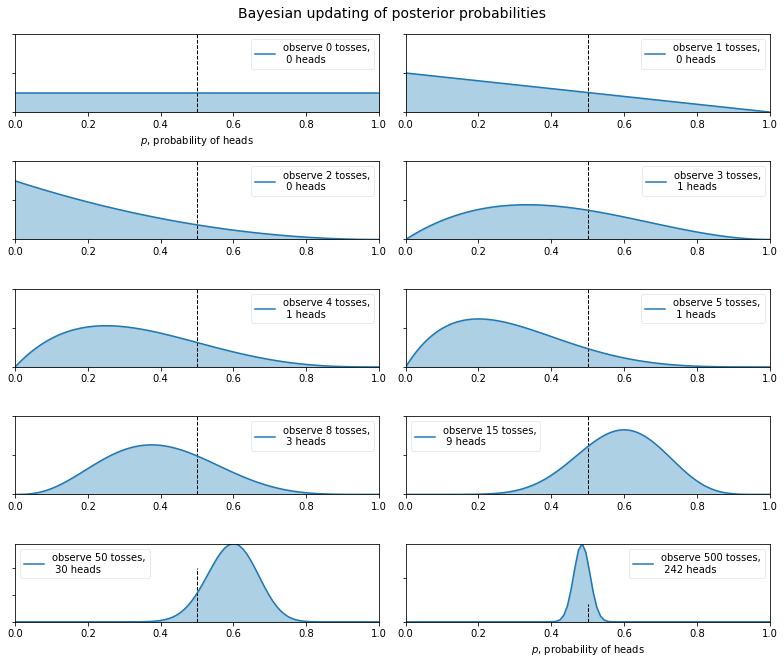

In [23]:
%run bayesian_updating_plot.py

## Outline of solving problems with Bayesian reasoning

Tim Salimans, the winner of the Kaggle contest "Observing Dark Words", used Bayesian inference to find the best locations for halos. His solution is presented well in "Bayesian Methods for Hackers", chapter 5.

Summary:

## Steps to doing Bayesian inference

1. Construct a prior distribution $p(x)$ for what you are predicting ($x$) -- i.e. formulate our expectations about the thing before looking at the data.

&nbsp; &nbsp; 2. Construct a probabilistic model for the data given the prior information: $p(e | x)$.

&nbsp; &nbsp; 3. Use Bayes’ rule to calculate the posterior distribution of the unknown quantities $x$.

In other words, use the data to determine a **probability distribution** over the unknowns.

&nbsp; &nbsp; 4. Minimize the expected loss with respect to the posterior distribution over the predictions for
$x$: 

$$
\hat{x} = \mathrm{argmin}_\mathrm{prediction} E p(x|e) [L(\mathrm{prediction}, x)]
$$

i.e. tune our predictions to be as good as possible for the given error metric.

This may be the maximum a-posteriori ("MAP") estimate or something else.

## Problems

### Problem 1: probability of a disease given a symptom 

Meningitis ($M$) can cause a a stiff neck ($S$), though there are many other causes for $S$, too.

We’d like to use $S$ as a diagnostic symptom and estimate $p(M|S)$.

Studies can easily estimate the prior probabilities $p(M)$, $p(S)$ and $p(S|M)$:

- $p(S|M)=0.7$
- $p(S)=0.01$
- $p(M)=0.00002$

In [24]:
prob_s_given_m = 0.7
prob_s = 0.01
prob_m = 0.00002

Applying Bayes’ Rule:
     $p(M|S) = \frac{p(S|M) p(M)}{p(S)}$

In [25]:
prob_m_given_s = prob_s_given_m * prob_m / prob_s
prob_m_given_s

0.0014

### Problem 2: maximum entropy

Derive a prior distribution for Australian postcodes using this information:

- Population statistics for different states: (from a population dataset)
- Prior knowledge that 50% of all mail is sent to postcodes 2000, 2001, 3000, 3001.
- Prior belief that the proportion of mail for other states that is sent to capital cities (i.e. 5000, 5001 etc.) is the same as for Sydney and Melbourne.

# Resources

## Books

- Edwin T. Jaynes: "Probability Theory: The Logic of Science". (Cambridge University Press). A masterpiece. Deep and very interesting. 

- Michael I Jordan's lecture notes (UC Berkeley): https://people.eecs.berkeley.edu/~jordan/courses.html

    - Bayesian modeling and inference, Spring 2010
    - Practical machine learning, Fall 2009

- D. S. Sivia with J Skilling: "Data analysis: A Bayesian tutorial"

## More books

- MacKay: Information Theory, Inference, and Learning Algorithms

- John Kruschke: Doing Bayesian Data Analysis. 2nd edition switches to JAGS and Stan (from BUGS). "The dog book" for the illustration of dogs on the cover.

- Andrew Gelman et al. Bayesian Data Analysis. CRC Press (3rd edition). The most influential and widely used Bayesian text by statisticians.

- Bayesian methods for Hackers: Pearson CMG. Useful because it serves as more accessible documentation to PyMC. The official PyMC docs assume prior knowledge of Bayesian inference.

## Software

- Stan: http://mc-stan.org. Upcoming successor to BUGS / JAGS. Compiles models to C++. Uses Hamiltonian Monte Carlo for posterior sampling.

- PyMC3: http://pymc-devs.github.io/pymc3/

- Edward: http://edwardlib.org. Variational inference package for Python built on TensorFlow.

## Datasets

- All datasets for the book "Probabilistic Programming and Bayesian methods for Hackers" are available on GitHub: https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers

In [10]:
from IPython.core.display import HTML
def css_styling():
    styles = open("bayes.css", "r").read()
    return HTML(styles)
# css_styling()